<a href="https://colab.research.google.com/github/yongjuncho123/dust/blob/main/Dust_Job02_EDA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
finalGD = pd.read_csv('/content/drive/MyDrive/data/totalGD.csv')

## 시각화 전 전처리

In [ ]:
finalGD.head()

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울,111274,강동구,2016010101,0.004,1.2,0.002,0.050,82.0,44.0,서울 강동구 구천면로 42길 59,NaN
1,서울,111274,강동구,2016010102,0.004,1.2,0.002,0.048,97.0,58.0,서울 강동구 구천면로 42길 59,NaN
2,서울,111274,강동구,2016010103,0.004,1.1,0.002,0.044,88.0,53.0,서울 강동구 구천면로 42길 59,NaN
3,서울,111274,강동구,2016010104,0.004,1.0,0.002,0.041,90.0,52.0,서울 강동구 구천면로 42길 59,NaN
4,서울,111274,강동구,2016010105,0.004,1.0,0.002,0.039,80.0,49.0,서울 강동구 구천면로 42길 59,NaN


In [ ]:
finalGD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역      8784 non-null   object        
 1   측정소코드   43824 non-null  int64         
 2   측정소명    43824 non-null  object        
 3   측정일시    43824 non-null  datetime64[ns]
 4   SO2     42809 non-null  float64       
 5   CO      43328 non-null  float64       
 6   O3      43252 non-null  float64       
 7   NO2     43317 non-null  float64       
 8   PM10    43824 non-null  float64       
 9   PM25    43824 non-null  float64       
 10  주소      43824 non-null  object        
 11  망       30696 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 4.0+ MB


In [ ]:
finalGD['측정일시'] = pd.to_datetime(finalGD['측정일시'])

In [ ]:
dropCol = ['지역', '측정소코드', '주소', '망']
finalGD = finalGD.drop(columns = dropCol)

In [ ]:
finalGD.tail()

,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25
43819,강동구,1970-01-01 00:00:02.019123120,0.003,0.5,0.013,0.028,23.0,17.0
43820,강동구,1970-01-01 00:00:02.019123121,0.003,0.4,0.015,0.025,25.0,19.0
43821,강동구,1970-01-01 00:00:02.019123122,0.003,0.4,0.015,0.023,24.0,17.0
43822,강동구,1970-01-01 00:00:02.019123123,0.003,0.5,0.004,0.040,25.0,18.0
43823,강동구,1970-01-01 00:00:02.019123124,0.003,0.5,0.005,0.037,27.0,18.0


### 기상데이터 추가 2016


In [ ]:
gisang2016  = pd.read_csv('/content/drive/MyDrive/data/기상청 추가 자료/기상관측2016.csv', encoding = 'cp949')
gisang2017  = pd.read_csv('/content/drive/MyDrive/data/기상청 추가 자료/기상관측2017.csv', encoding = 'cp949')
gisang2018  = pd.read_csv('/content/drive/MyDrive/data/기상청 추가 자료/기상관측2018.csv', encoding = 'cp949')
gisang2019  = pd.read_csv('/content/drive/MyDrive/data/기상청 추가 자료/기상관측2019.csv', encoding = 'cp949')

In [ ]:
gisang2016.head()

,지점,지점명,일시,기온(°C),강수량(mm),풍향(16방위)
0,108,서울,2016-01-01 01:00:00,-2.1,NaN,90
1,108,서울,2016-01-01 02:00:00,-2.2,NaN,0
2,108,서울,2016-01-01 03:00:00,-2.5,NaN,90
3,108,서울,2016-01-01 04:00:00,-2.9,NaN,70
4,108,서울,2016-01-01 05:00:00,-3.2,NaN,90


In [ ]:
gisang2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   지점        8761 non-null   int64         
 1   지점명       8761 non-null   object        
 2   일시        8761 non-null   datetime64[ns]
 3   기온(°C)    8761 non-null   float64       
 4   강수량(mm)   824 non-null    float64       
 5   풍향(16방위)  8754 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 410.8+ KB


In [ ]:
gisang2016['일시'] = pd.to_datetime(gisang2016['일시'])
gisang2017['일시'] = pd.to_datetime(gisang2017['일시'])
gisang2018['일시'] = pd.to_datetime(gisang2018['일시'])
gisang2019['일시'] = pd.to_datetime(gisang2019['일시'])

In [ ]:
gisang2016 = gisang2016.drop(['지점', '지점명'], axis = 1)

In [ ]:
gisang2016.tail(5)

,일시,기온(°C),강수량(mm),풍향(16방위)
8779,2016-12-31 20:00,1.9,NaN,20
8780,2016-12-31 21:00,1.4,NaN,20
8781,2016-12-31 22:00,0.8,NaN,20
8782,2016-12-31 23:00,0.6,NaN,20
8783,2017-01-01 0:00,0.2,NaN,20


In [ ]:
gisang2016[gisang2016['강수량(mm)'] == 0 & gisang2016['일시'].isin(['2016-08'])]

,지점,지점명,일시,기온(°C),강수량(mm),풍향(16방위)
302,108,서울,2016-01-13 15:00:00,-0.6,0.0,340
329,108,서울,2016-01-14 18:00:00,-1.2,0.0,230
332,108,서울,2016-01-14 21:00:00,-1.7,0.0,200
335,108,서울,2016-01-15 00:00:00,-1.1,0.0,230
374,108,서울,2016-01-16 15:00:00,2.7,0.0,90
...,...,...,...,...,...,...
8585,108,서울,2016-12-23 18:00:00,-3.0,0.0,270
8654,108,서울,2016-12-26 15:00:00,4.3,0.0,230
8657,108,서울,2016-12-26 18:00:00,3.2,0.0,360
8714,108,서울,2016-12-29 03:00:00,-2.9,0.0,290


In [ ]:
gisang2016['강수량(mm)'] = gisang2016['강수량(mm)'].replace(0, 0.01)

In [ ]:
gisang2016['강수량(mm)'] = gisang2016['강수량(mm)'].fillna(0)

In [ ]:
bins = [0, 44, 89, 134, 179, 224, 269, 314, 360]
label = [1, 2, 3, 4, 5, 6, 7, 8]
gisang2016['풍향범주'] = pd.cut(gisang2016['풍향(16방위)'], bins = bins, labels = label)

In [ ]:
for i in range(len(gisang2016)):
    if gisang2016.loc[i, '풍향(16방위)'] == 0:
        gisang2016.loc[i, '풍향범주'] = 1

In [ ]:
for i in range(len(gisang2016)):
    if gisang2016.loc[i, '풍향(16방위)'] == 360:
        gisang2016.loc[i, '풍향범주'] = 1

In [ ]:
gisang2016.head(5)

,기온(°C),강수량(mm),풍향(16방위),Year,Month,Date,Hour,풍향범주
0,-2.1,0.0,90,2016,1,1,1,3
1,-2.2,0.0,0,2016,1,1,2,1
2,-2.5,0.0,90,2016,1,1,3,3
3,-2.9,0.0,70,2016,1,1,4,2
4,-3.2,0.0,90,2016,1,1,5,3


In [ ]:
gisang2016.isnull().sum()

기온(°C)      0
강수량(mm)     0
풍향(16방위)    0
Year        0
Month       0
Date        0
Hour        0
풍향범주        0
dtype: int64

In [ ]:
TD_GD2016 = pd.merge(TD_GD2016, gisang2016, on = ['Year', 'Month', 'Date', 'Hour']) # pd.merge를 쓰게 된다면 df1, df2, on절(조건) 이렇게 쓰면 df1 오른쪽에 df2가 on절 기준으로 합쳐지게 된다.

In [ ]:
TD_GD2016.describe()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,Year,Month,Date,Hour,기온(°C),강수량(mm),풍향(16방위)
count,8.784000e+03,8659.000000,8645.000000,8592.000000,8660.000000,8784.000000,8784.000000,8784.0,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2.016067e+09,0.004237,0.509080,0.019209,0.033178,52.336578,26.887124,2016.0,6.514913,15.760246,12.500000,13.584711,0.113272,199.436475
std,3.453119e+04,0.001097,0.182556,0.016372,0.015833,30.964442,14.892261,0.0,3.451425,8.812125,6.922581,11.428998,1.005716,115.344881
min,2.016010e+09,0.002000,0.200000,0.001000,0.003000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,-18.000000,0.000000,0.000000
25%,2.016040e+09,0.004000,0.400000,0.005000,0.021000,33.000000,16.000000,2016.0,4.000000,8.000000,6.750000,3.900000,0.000000,70.000000
50%,2.016070e+09,0.004000,0.500000,0.016000,0.031000,47.000000,25.000000,2016.0,7.000000,16.000000,12.500000,14.900000,0.000000,250.000000
75%,2.016100e+09,0.005000,0.600000,0.028000,0.043000,67.000000,35.000000,2016.0,10.000000,23.000000,18.250000,23.125000,0.000000,290.000000
max,2.016123e+09,0.011000,1.800000,0.110000,0.114000,475.000000,101.000000,2016.0,12.000000,31.000000,24.000000,36.400000,32.000000,360.000000


### 기상데이터 추가 2017

## 시각화


In [ ]:
# 원하는 데이터를 따로 인덱싱 해서 시각화 할 때 사용 가능하다.
# 월별 평균
filter1 = TD_GD2016.groupby('Month')['PM10'].mean().reset_index()
filter2 = TD_GD2017.groupby('Month')['PM10'].mean().reset_index()
filter3 = TD_GD2018.groupby('Month')['PM10'].mean().reset_index()
filter4 = TD_GD2019.groupby('Month')['PM10'].mean().reset_index()

In [ ]:
filter5 = TD_GD2016.groupby('Month')['PM25'].mean().reset_index()
filter6 = TD_GD2017.groupby('Month')['PM25'].mean().reset_index()
filter7 = TD_GD2018.groupby('Month')['PM25'].mean().reset_index()
filter8 = TD_GD2019.groupby('Month')['PM25'].mean().reset_index()

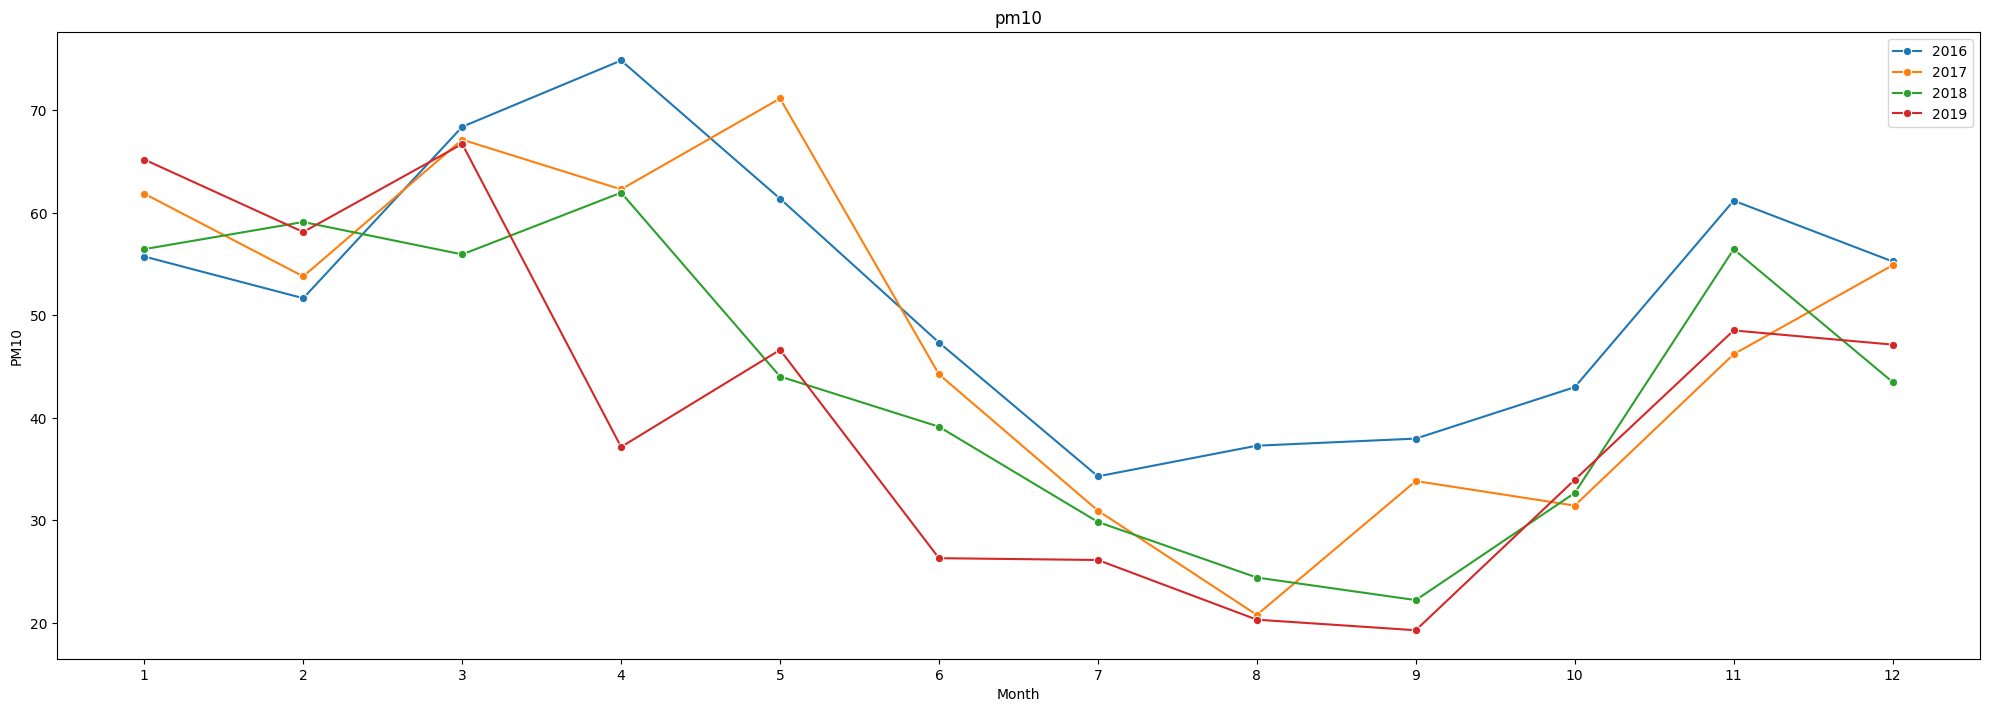

In [ ]:
plt.figure(figsize = (20,7))
sns.lineplot(data = filter1, x = 'Month', y = 'PM10', label = 2016, marker = 'o')
sns.lineplot(data = filter2, x = 'Month', y = 'PM10', label = 2017, marker = 'o')
sns.lineplot(data = filter3, x = 'Month', y = 'PM10', label = 2018, marker = 'o')
sns.lineplot(data = filter4, x = 'Month', y = 'PM10', label = 2019, marker = 'o')
plt.xticks(range(1, 13)) ## xticks의 범위를 지정해주면 x축의 라벨링을 통해 좀 더 쉽게 볼 수 있다.
plt.xlabel('Month')
plt.ylabel('PM10')


plt.tight_layout()
plt.title("pm10")
plt.show()

# 미세먼지 pm10dms 겨울에 심하고 여름에 덜하다.

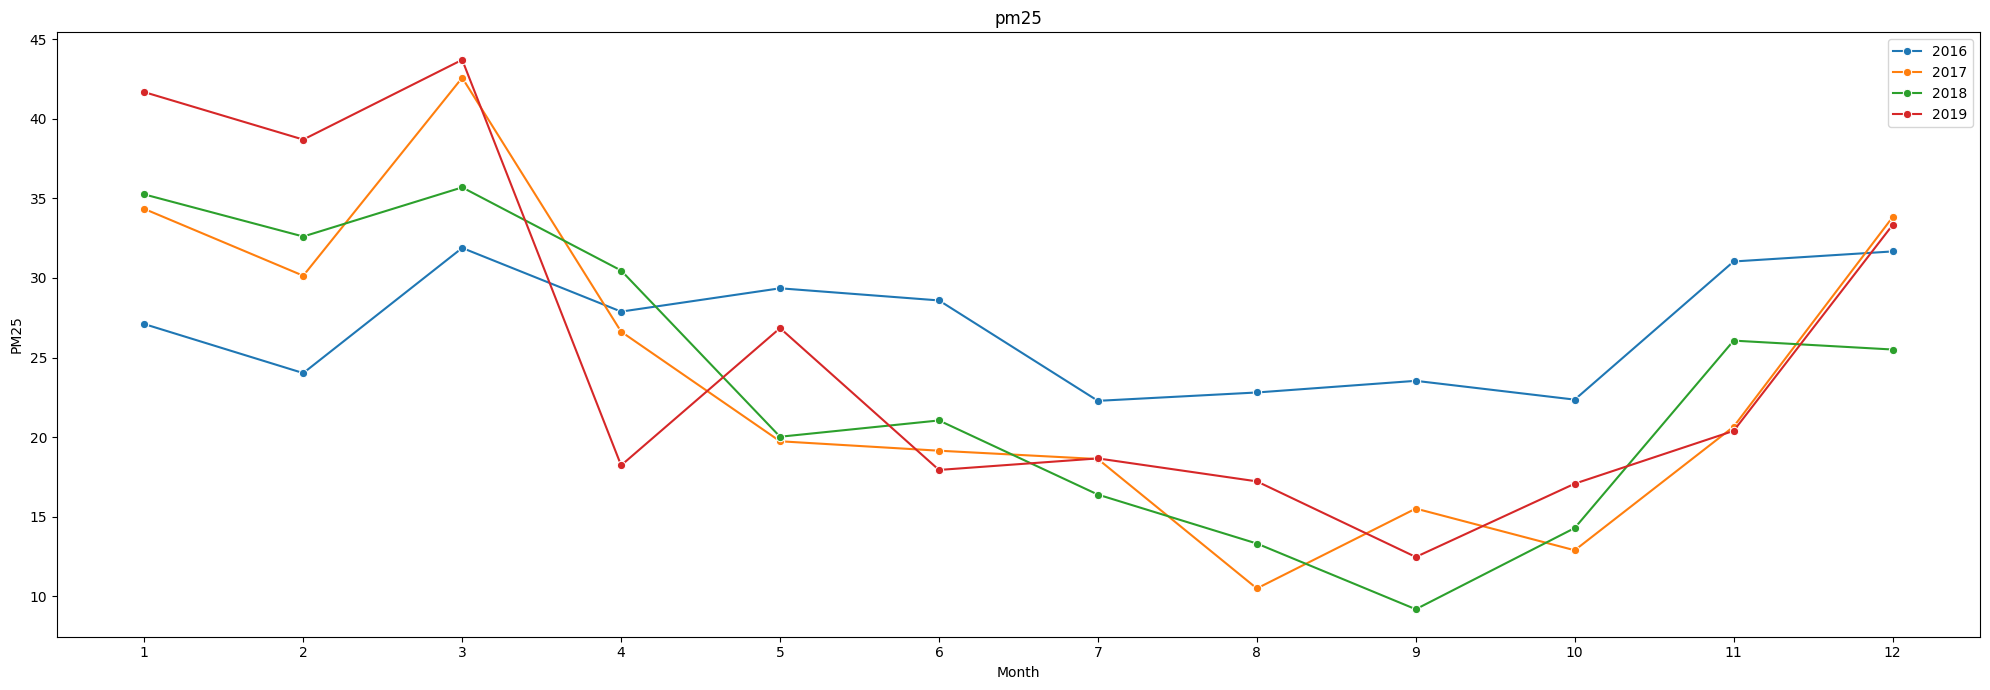

In [ ]:
plt.figure(figsize = (20,7))
sns.lineplot(data = filter5, x = 'Month', y = 'PM25', label = 2016, marker = 'o')
sns.lineplot(data = filter6, x = 'Month', y = 'PM25', label = 2017, marker = 'o')
sns.lineplot(data = filter7, x = 'Month', y = 'PM25', label = 2018, marker = 'o')
sns.lineplot(data = filter8, x = 'Month', y = 'PM25', label = 2019, marker = 'o')
plt.xticks(range(1, 13)) ## xticks의 범위를 지정해주면 x축의 라벨링을 통해 좀 더 쉽게 볼 수 있다.
plt.xlabel('Month')
plt.ylabel('PM25')

plt.title("pm25")
plt.tight_layout()
plt.show()

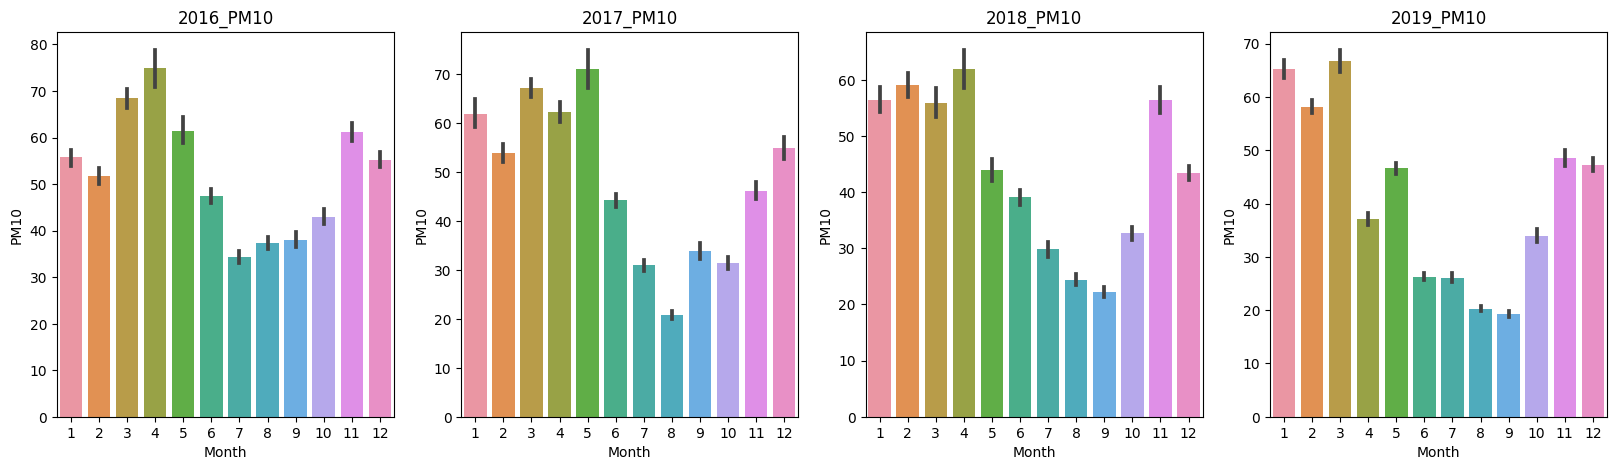

In [ ]:
f, axes = plt.subplots(ncols=4)
f.set_size_inches((20, 5))
sns.barplot(x='Month', y='PM10', data = TD_GD2016, ax = axes[0])
sns.barplot(x='Month', y='PM10', data = TD_GD2017, ax = axes[1])
sns.barplot(x='Month', y='PM10', data = TD_GD2018, ax = axes[2])
sns.barplot(x='Month', y='PM10', data = TD_GD2019, ax = axes[3])

axes[0].set_title("2016_PM10")
axes[1].set_title("2017_PM10")
axes[2].set_title("2018_PM10")
axes[3].set_title("2019_PM10")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

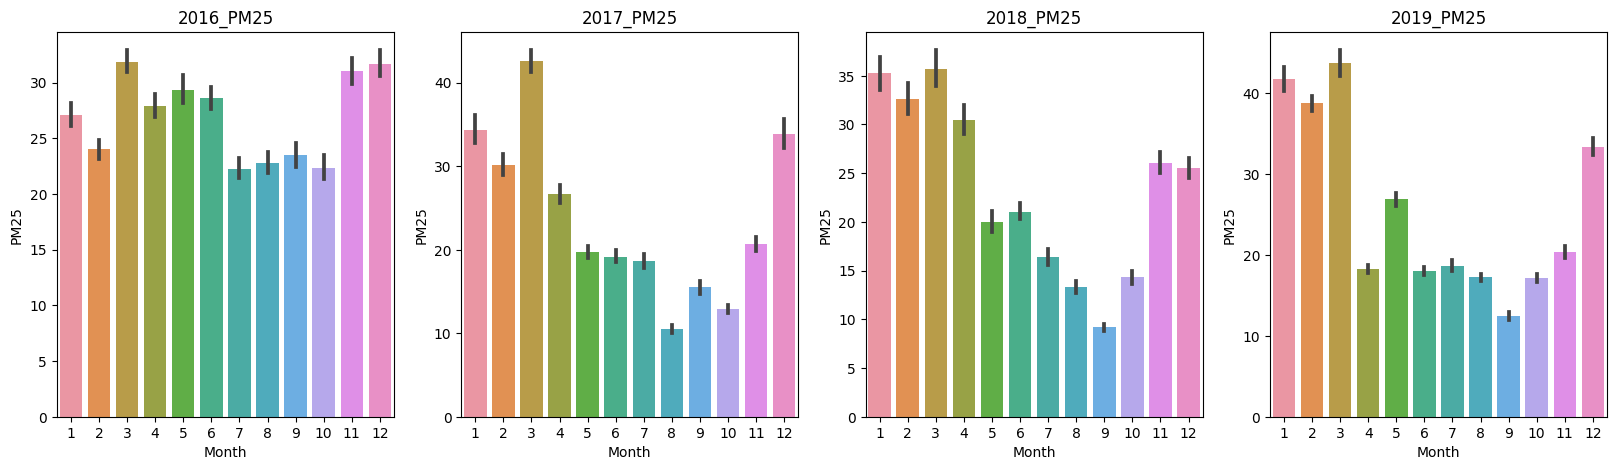

In [ ]:
f, axes = plt.subplots(ncols=4)
f.set_size_inches((20, 5))

sns.barplot(x='Month', y='PM25', data = TD_GD2016, ax = axes[0])
sns.barplot(x='Month', y='PM25', data = TD_GD2017, ax = axes[1])
sns.barplot(x='Month', y='PM25', data = TD_GD2018, ax = axes[2])
sns.barplot(x='Month', y='PM25', data = TD_GD2019, ax = axes[3])

axes[0].set_title("2016_PM25")
axes[1].set_title("2017_PM25")
axes[2].set_title("2018_PM25")
axes[3].set_title("2019_PM25")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

# 시간별 pm 농도 평균을 넣으면 좋겠다
